In [1]:
# T-검증.. 데이터에서 찾은 평균으로 두 그룹에 차이가 있는지 확인하는 방법
# 와인품질이 1등급 인지 2등급인지에 따라서 가격에 차이가 있는지 확인
# 시각화 - 히스토그램

In [2]:
# 과수원에서 알려진 사과의 평균무게는 200g 
# 실제 그런지 알아보기 위해 임의로 15개를 뽑아서 무게를 측정하고 해당데이터를 가지고
#과수원에서 생산되는 전체사과 무게의 평균이 200과 같다고 할수 있는지 검증
#귀무가설 : 과수원에서 생산되는 사과의 무게 평균이 200g이다
#대립가설 : 과수원에서 생산되는 사과의 무게 평균이 200g이 아니다

In [3]:
apple_mean = 200  # 알려진평균
# 수집데이터
data = [200,210,180,190,185,170,180,180,210,180,183,191,204,201,186]


15

In [4]:
# 데이터가 30개 이하면 별도의 정규성 검증이 필요
from scipy.stats import shapiro
shapiro(data)
# 1. 검정통계  2, p-value  
# 정규성검사에서는 p-value가 유의수준 0.05보다 클경우 표본이 정규분포를따른다.

ShapiroResult(statistic=0.9217347502708435, pvalue=0.20472237467765808)

<AxesSubplot:>

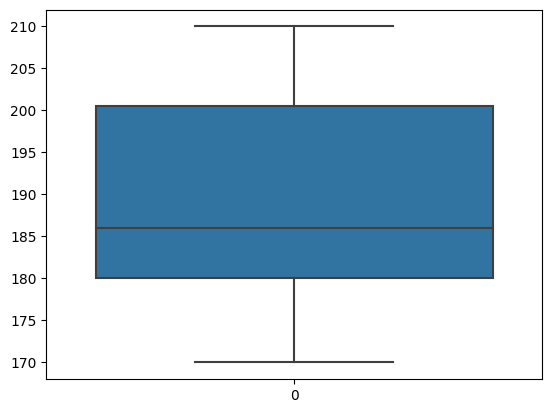

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=data)

In [6]:
# 일표본 T-검증을 사용 one-sample t-test
# 가정 : 모집단의 구성요소들이 정규분포를 이룬다는 가정하에서 검정통계량 값을 계산
# 종속변수는 연속형 변수여야하고 검증하고자하는 기준값이 있어야 한다.
# 단일 모집단에서 알고자하는 값이 종속변수

In [8]:
from scipy.stats import ttest_1samp
ttest_1samp(data, apple_mean)

Ttest_1sampResult(statistic=-3.1562714293709564, pvalue=0.007003780898109026)

In [9]:
# T-value는 -3.1562714293709564 , 유의확율(p-value) 0.007003780898109026  유의확율은 0.05보다 작다
# 귀무가설을 기각 --- 

# 과수원에서 생산되는 사과의 평균 무게는 200g 이 아니다.
# 설정한 기준값과(apple_meam) 종속변수의 평균값 사이에 차이가 - 통계적으로 유의하다...두 값이 다르다는 결론

In [10]:
# 대응표본 t-검증(paired smaple t-test)
# 단일모집단에 대해서 두번의 처리 두 개의 처리에 따른 평균의 차이를 비교
# 모집단에서 크기가 n개인 표본하나 추출, 표본내의 데이터중에서 두번의 측정
# 모집단과 표본은 하나씩... 각 객체들에 대해 두개씩 관측값이 존재
# 부부 30쌍을 대상으로 남편과 아내의 결혼 만족도에 차이, 쌍둥이 연구 before-after연구

In [11]:
# 10명의 환자에게 수면영야제를 복용하기 전과 복용후의 수면 시간측정 영양제가 효과가 있는지 판단 
# 단 정규성을 만족한다는 가정
#귀무가설 : 전과 후의 수면시간에 차이가 없다
#대랍가설 : 전과 후의 수면시간에 차이가 있다

In [13]:
import pandas as pd

In [15]:
before = [7,3,4,5,2,1,6,6,5,4]
after = [8,4,5,6,2,3,6,8,6,5]
when = ['before','after']

# for j in range(2):
#     for i in range(10)
when = [when[j] for j in range(2) for i in range(10)]
df = pd.DataFrame({'when':when, 'score':before+after})
df.head()

,when,score
0,before,7
1,before,3
2,before,4
3,before,5
4,before,2


In [16]:
# 정규성 검증
normal1 = shapiro(before)
normal2 = shapiro(after)
normal1, normal2
# 둘다 0.05보다 크기때문에 정규성에 문제가 없음

(ShapiroResult(statistic=0.9644591808319092, pvalue=0.835266649723053),
 ShapiroResult(statistic=0.945683479309082, pvalue=0.6177965998649597))

In [17]:
# t- 검증
import scipy.stats
scipy.stats.ttest_rel(before,after)
# p-value가 0.05보다 작기때문에 귀무가설 기각  수면영양제를 복용하기전과 복용후의 
#수면시간의 차이는 통계적으로 유의하다, 영양제먹고 수면시간에 영향이 있다 

Ttest_relResult(statistic=-4.743416490252569, pvalue=0.001053871257016553)

In [18]:
# 독립표본 t-검증(independent sample t-teset)
# 두개의 독립된 모집단의 평균을 비교할때 사용
# 부부100쌍을뽑아서 남편100명과 아내100으로 집단을 비교

In [ ]:
# 두지역의 낮 최고기온에 차이가 있는지 알아본다
# 귀무가설 : a,b 두 지역에 낮 최고 기온은 차이가없다
# 대립가설 : a,b 두 지역에 낮 최고 기온은 차이가있다

In [20]:
a = [-1,0,3,4,1,3,3,1,1,3]
b = [6,6,8,8,11,11,10,8,8,9]
group = ['a']*10 + ['b']*10
df = pd.DataFrame({'group':group, 'temp':a+b})
df.head()

,group,temp
0,a,-1
1,a,0
2,a,3
3,a,4
4,a,1


In [21]:
shapiro(a),shapiro(b)

(ShapiroResult(statistic=0.9004895687103271, pvalue=0.22182336449623108),
 ShapiroResult(statistic=0.9001172184944153, pvalue=0.21974670886993408))

In [22]:
scipy.stats.ttest_ind(a,b)
# p-value 0.05보다 작으므로 유의수준보다 작다 귀무가설 기각... 통계적으로 유의미하다... 

Ttest_indResult(statistic=-8.805969882200301, pvalue=6.085029390352169e-08)